<a href="https://colab.research.google.com/github/AmmarSahyoun/AI-ProjektSubmission/blob/master/mobilePrice_MultiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this kernel I aim to find out association between features of a mobile phone and its selling price. 
## The Data set has a price_range, so i need to figure out which is the best model that can classify a mobile to its price_range.
## https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# Starting with EDA

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [4]:
train_data.info() # we have 2000 samples and 11 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_data.isnull().any() # check for null value

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [6]:
# We have 4 price groups in our data
train_data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Correlation ')

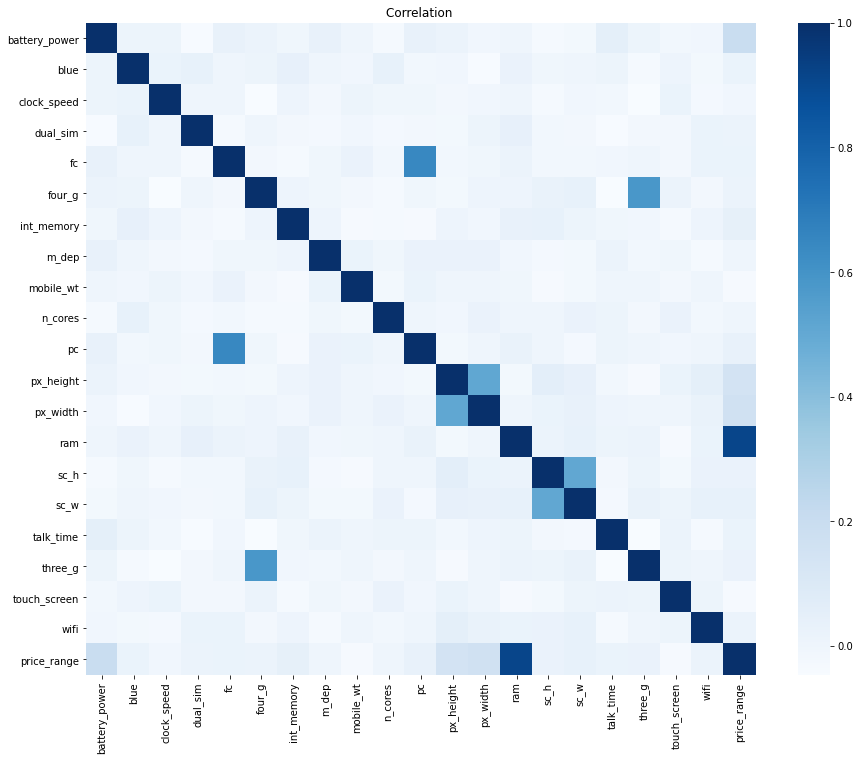

In [7]:
corr = train_data.corr() #take a look at the features association
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues')
r.set_title("Correlation ")

In [8]:
# The target price range has highly positive correlation between ram, what about other features correlation with the price range?
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

### We can notice that the Ram, battery and the dimensions of the mobile are the most important features.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121ff723c8>,
      dtype=object)

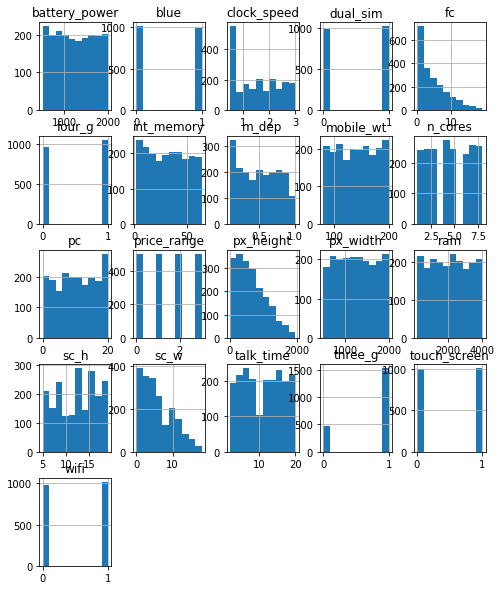

In [9]:
fig = plt.figure(figsize = (8,10))
ax = fig.gca()
train_data.hist(ax = ax)

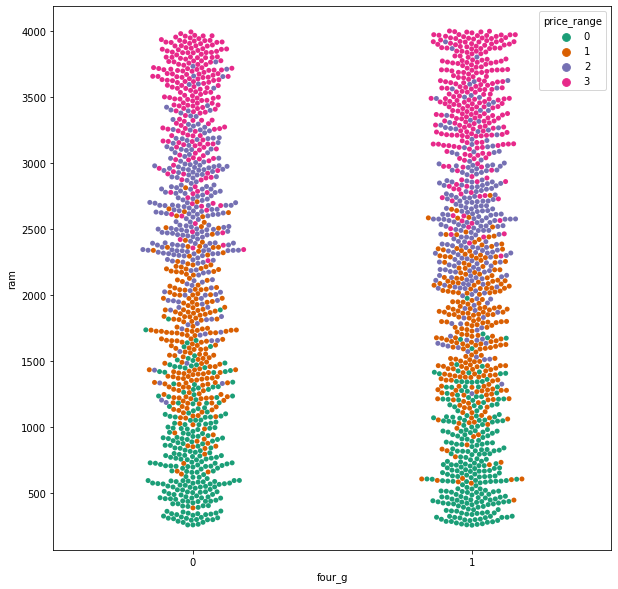

In [10]:
# will plot the 4G and ram values according to price range.
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=train_data)
ax=sns.set(style="darkgrid")

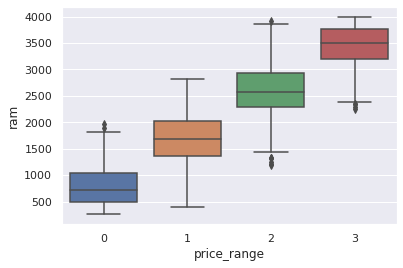

In [11]:
# The Boxplot shows distribution of ram values according to price range. 
sns.boxplot(x = 'price_range',y = 'ram', data=train_data)

## Univariate Feature Selection

Uses staistical test to select those features that have strongest relationship with target variable.

In [12]:
x = train_data.iloc[:,0:20]
y = train_data.iloc[:,20:]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [13]:
print(y.shape)

(2000, 1)


# Data preparation
### I will drop the features with weak relations with the price range.

In [14]:
best_feat = SelectKBest(chi2,k=10)
fit = best_feat.fit(x,y)

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [16]:
# concat both dataframes for comparing best scores

score_list = pd.concat([dfcolumns,dfscores],axis=1)
score_list.columns = ["features","scores"]

In [17]:
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [18]:
print(score_list.nlargest(10,"scores"))

         features         scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


Selecting the best features

In [19]:
train_data.drop(train_data.columns[[1,2,3,5,7,9,10,17,18,19]],axis=1,inplace=True)

In [20]:
train_data.head()

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,1,7,188,20,756,2549,9,7,19,1
1,1021,0,53,136,905,1988,2631,17,3,7,2
2,563,2,41,145,1263,1716,2603,11,2,9,2
3,615,0,10,131,1216,1786,2769,16,8,11,2
4,1821,13,44,141,1208,1212,1411,8,2,15,1


## Splitting dependent and independent variable

In [21]:
x = train_data.iloc[:,:10].values
y = train_data.iloc[:,10].values
y

array([1, 2, 2, ..., 3, 0, 3])

## Applying cross validation technique on various models

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


### # k-nearest neighbors has the best ML result

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)
print(f"KNN score: {knn.score(x_test,y_test)}")
print(f"KNN MSE: {mean_squared_error(knn_predict,y_test)}")

KNN score: 0.9525
KNN MSE: 0.0475


In [25]:
from sklearn.metrics import r2_score
print(f"R2 score: {r2_score(y_test, knn_predict)}")

R2 score: 0.9631382896166382


In [26]:
cm = confusion_matrix(y_test, knn_predict)
print(cm)

[[ 95   0   0   0]
 [  2  89   1   0]
 [  0   6  91   2]
 [  0   0   8 106]]


### The result with ANN

In [27]:
ann = tf.keras.models.Sequential() # instantiate ANN instance 

In [28]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #Adding the input layer and the first hidden layer

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # Adding the second hidden layer

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation='softmax')) # Adding the output layer using softmax as for MultiClassification

In [31]:
# Compile tha ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Training the ANN
ann.fit(x_train, y_train, batch_size=32, epochs= 100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: -7.3196 - accuracy: 0.2550
Epoch 2/100
50/50 [==============================] - 0s 942us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 3/100
50/50 [==============================] - 0s 981us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 4/100
50/50 [==============================] - 0s 941us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 5/100
50/50 [==============================] - 0s 911us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: -7.3196 - accuracy: 0.2550
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: -7.3196 - accuracy: 0.2550
Epoch 8/100
50/50 [==============================] - 0s 927us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 9/100
50/50 [==============================] - 0s 929us/step - loss: -7.3196 - accuracy: 0.2550
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: -7.3196 - accu

In [33]:
ann.summary() # The number of parameter used in this ANN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 6)                   66        
_________________________________________________________________
dense_1 (Dense)              (32, 6)                   42        
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [34]:
y_pred = ann.predict(x_test)
y_pred.shape

(400, 1)

In [35]:
y_pred = y_pred > 0.5

In [36]:
# Compare the predicted result with the real
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 3]
 [1 0]
 [1 2]
 [1 2]
 [1 2]
 [1 0]
 [1 0]
 [1 3]
 [1 3]
 [1 1]
 [1 1]
 [1 3]
 [1 0]
 [1 2]
 [1 3]
 [1 0]
 [1 3]
 [1 2]
 [1 2]
 [1 1]
 [1 0]
 [1 0]
 [1 3]
 [1 1]
 [1 2]
 [1 2]
 [1 3]
 [1 1]
 [1 3]
 [1 1]
 [1 1]
 [1 0]
 [1 2]
 [1 0]
 [1 1]
 [1 3]
 [1 0]
 [1 0]
 [1 3]
 [1 3]
 [1 3]
 [1 1]
 [1 3]
 [1 3]
 [1 1]
 [1 3]
 [1 0]
 [1 1]
 [1 3]
 [1 1]
 [1 1]
 [1 3]
 [1 0]
 [1 3]
 [1 0]
 [1 3]
 [1 2]
 [1 2]
 [1 0]
 [1 3]
 [1 3]
 [1 1]
 [1 3]
 [1 2]
 [1 1]
 [1 2]
 [1 3]
 [1 2]
 [1 2]
 [1 2]
 [1 3]
 [1 2]
 [1 1]
 [1 0]
 [1 1]
 [1 3]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 3]
 [1 3]
 [1 3]
 [1 0]
 [1 0]
 [1 0]
 [1 2]
 [1 1]
 [1 2]
 [1 3]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 0]
 [1 3]
 [1 3]
 [1 3]
 [1 0]
 [1 3]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 3]
 [1 2]
 [1 2]
 [1 3]
 [1 2]
 [1 3]
 [1 3]
 [1 0]
 [1 0]
 [1 1]
 [1 3]
 [1 3]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 3]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 2]
 [1 1]
 [1 3]
 [1 2]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [1 2]
 [1 0]
 [1 1]
 [1 1]
 [1 2]
 [1 1]

# Conclusion 
##The ANN does not work well with the data set even I add a third layer and raise the epochs to 300.
## Anyway the KNN model has a great accuracy and confusion matrix result with this data set